In [1]:
%matplotlib inline
# This command is to plot images in the notebook

In [2]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 0
    f = -e^(3 x) (4 - (3 + 4 π^2) x + (-9 + 4 π^2) x^2) sin(2 π y)
"""

from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(16, 16)
V = FunctionSpace(mesh, 'P', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [13]:
# Define boundary condition
u_D = Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('-1*exp(3*x[0])*(4 - (3 + 4 *pow(pi, 2))*x[0] + (-9 + 4 *pow(pi, 2))* pow(x[0], 2))*sin(2*pi*x[1])', degree=1)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

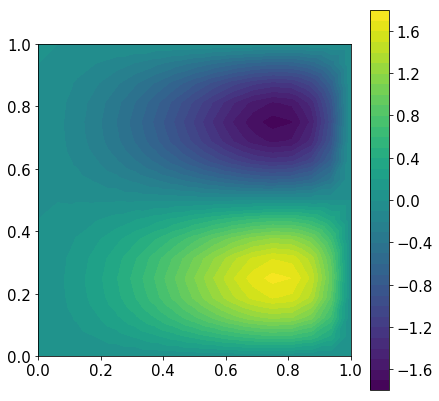

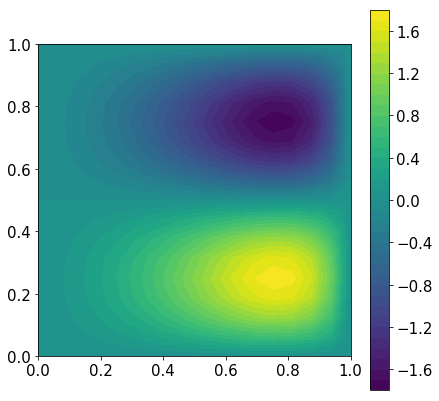

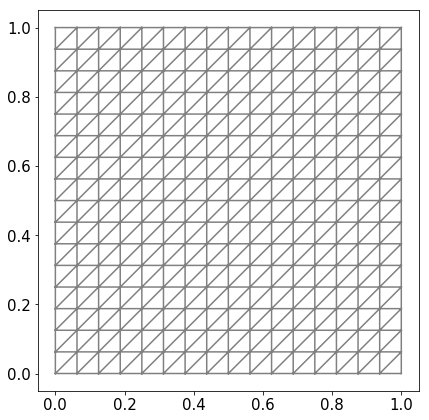

In [14]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh 
plt.rcParams['figure.figsize'] = 7, 7
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.colorbar(plot(u))
plt.show()

u_anal =  Expression('(x[0]-pow(x[0], 2))*exp(3*x[0])*sin(2*pi*x[1])', degree=3)
u_anal_int = interpolate(u_anal, V)
plt.colorbar(plot(u_anal_int))
plt.show()

plot(mesh)
plt.show()

error_L2  = 0.0358376798350351
error_max = 0.0492930818377


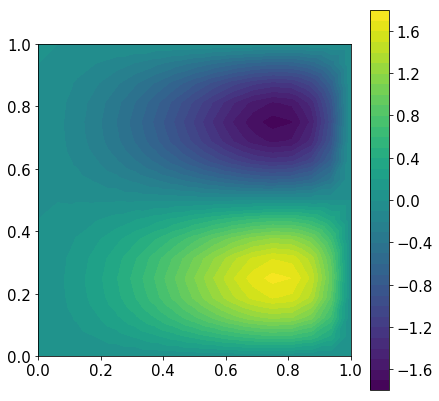

In [15]:
# Compute error in L2 norm
error_L2 = errornorm(u_anal, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_anal.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
#plot solution
plt.colorbar(plot(u))
plt.show()

In [16]:
error_L2  = 0.13262966014030148
error_L2  = 0.03583767983503361

In [8]:
r = 1
delta = 1.0
alpha = 1.0*r*r
f = Expression("-exp(3*x[0])*(-9*pow(x[0],2)-3*x[0]+4)*sin(2*pi*x[1]) \
+(x[0]-pow(x[0],2))*exp(3*x[0])*4*pow(pi,2)*sin(2*pi*x[1])", degree=1)
g = Constant(0.0)
Th = UnitSquareMesh(8,8)
Vh = FunctionSpace(Th, "DG", r)
u = TrialFunction(Vh)
v = TestFunction(Vh)
n = FacetNormal(Th)
h = CellSize(Th)

--- Instant: compiling ---


Calling FFC just-in-time (JIT) compiler, this may take some time.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


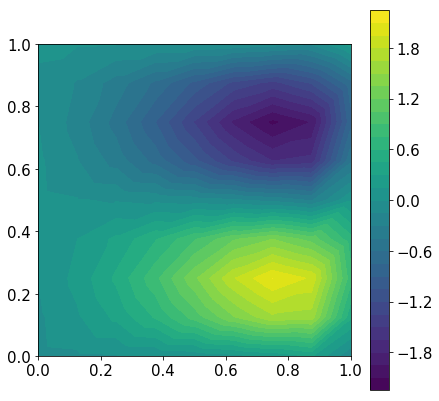

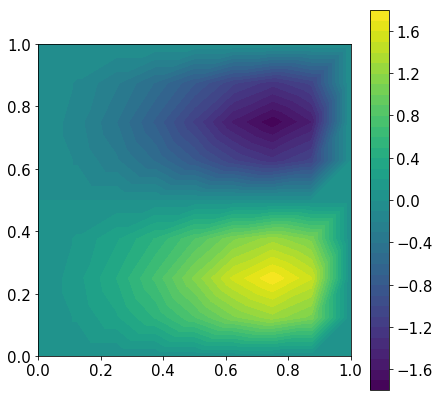

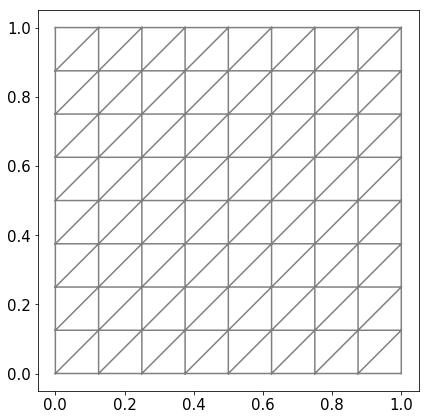

In [9]:
a = dot(grad(u), grad(v))*dx - dot(jump(v, n), avg(grad(u)))*dS \
+ alpha/avg(h)*dot(jump(u, n), jump(v, n))*dS \
- v*dot(grad(u), n)*ds  + alpha/h*u*v*ds
L = f*v*dx + alpha/h*g*v*ds
u = Function(Vh)
solve(a==L, u)

# Plot solution and mesh 
plt.rcParams['figure.figsize'] = 7, 7
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.colorbar(plot(u))
plt.show()

u_anal =  Expression('(x[0]-pow(x[0], 2))*exp(3*x[0])*sin(2*pi*x[1])', degree=3)
u_anal_int = interpolate(u_anal, Vh)
plt.colorbar(plot(u_anal_int))
plt.show()

plot(Th)
plt.show()

In [10]:
# Compute error in L2 norm
error_L2 = errornorm(u_anal, u, 'L2')

# Print errors
print('error_L2  =', error_L2)


error_L2  = 0.14441612694564193


In [ ]:
error_L2  = 0.09120896912101512 #error 8x8 SIPG, alpha =10
error_L2  = 0.02608321855239628 #error 16x16 SIPG, alpha =10

error_L2  = 0.06783200088832002 #error 8x8 NIPG, alpha =10
error_L2  = 0.01773624687078425 #error 16x16 NIPG, alpha =10

error_L2  = 0.0758257383077401 #error 8x8 IIPG, alpha =10
error_L2  = 0.020456627537160866 #error 16x16 IIPG, alpha =10